### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

###############################################################################################################

img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

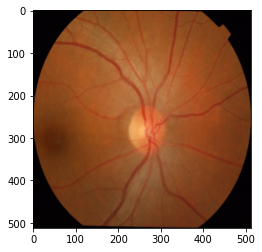

(50, 512, 512, 3)


(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
lab_train = convert_to_lab_color(img_train)
len(lab_train)

50

### Test images

In [5]:
lab_test = convert_to_hsv_color(img_test)
len(lab_test)

51

#### Generator of augmented data:

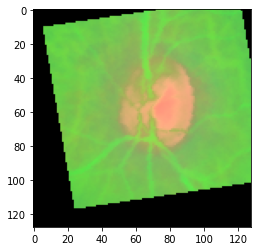

In [6]:
gen = data_generator(lab_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(batch[0][0])

51
51


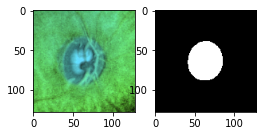

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(lab_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
print(len(X_test)) 
print(len(Y_test))

#-----------------------
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [8]:
epochs = NUM_EPOCHS
spe = SPE

model = create_compile_model(img_size)
history_cup = train(lab_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_lab', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 71s 680ms/step - loss: 1.6368 - mean_IOU_gpu: 0.0187 - dice_metric: 0.0365 - val_loss: 1.4629 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 72s 731ms/step - loss: 1.4623 - mean_IOU_gpu: 0.0020 - dice_metric: 0.0039 - val_loss: 1.4330 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 73s 741ms/step - loss: 1.3188 - mean_IOU_gpu: 0.0333 - dice_metric: 0.0606 - val_loss: 1.4499 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 71s 713ms/step - loss: 1.0056 - mean_IOU_gpu: 0.2656 - dice_metric: 0.3849 - val_loss: 2.0424 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 74s 747ms/step - loss: 0.5469 - mean_IOU_gpu: 0.4583 - dice_metric: 0.6065 - val_loss: 3.8114 - val_mean_IOU_gpu: 0

99/99 [==============================] - 63s 639ms/step - loss: 0.1887 - mean_IOU_gpu: 0.7081 - dice_metric: 0.8149 - val_loss: 10.4301 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 41/500
99/99 [==============================] - 65s 658ms/step - loss: 0.2091 - mean_IOU_gpu: 0.6837 - dice_metric: 0.7949 - val_loss: 10.1022 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 42/500
99/99 [==============================] - 65s 654ms/step - loss: 0.2049 - mean_IOU_gpu: 0.6969 - dice_metric: 0.8042 - val_loss: 10.7568 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 43/500
99/99 [==============================] - 66s 664ms/step - loss: 0.2004 - mean_IOU_gpu: 0.6878 - dice_metric: 0.8005 - val_loss: 10.4469 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 44/500
99/99 [==============================] - 64s 649ms/step - loss: 0.2194 - mean_IOU_gpu: 0.6867 - dice_metric: 0.7949 - val_loss: 10.2652 - val_mean_IOU_gpu: 0.00

99/99 [==============================] - 65s 661ms/step - loss: 0.1661 - mean_IOU_gpu: 0.7393 - dice_metric: 0.8360 - val_loss: 10.4000 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 80/500
99/99 [==============================] - 65s 657ms/step - loss: 0.1573 - mean_IOU_gpu: 0.7298 - dice_metric: 0.8338 - val_loss: 10.9012 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 81/500
99/99 [==============================] - 64s 649ms/step - loss: 0.1621 - mean_IOU_gpu: 0.7242 - dice_metric: 0.8291 - val_loss: 11.0715 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 82/500
99/99 [==============================] - 66s 668ms/step - loss: 0.1496 - mean_IOU_gpu: 0.7325 - dice_metric: 0.8371 - val_loss: 10.6660 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 83/500
99/99 [==============================] - 66s 670ms/step - loss: 0.1361 - mean_IOU_gpu: 0.7514 - dice_metric: 0.8504 - val_loss: 10.6021 - val_mean_IOU_gpu: 0.00

Epoch 118/500
99/99 [==============================] - 64s 648ms/step - loss: 0.1441 - mean_IOU_gpu: 0.7377 - dice_metric: 0.8413 - val_loss: 12.0405 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 119/500
99/99 [==============================] - 64s 648ms/step - loss: 0.1721 - mean_IOU_gpu: 0.7055 - dice_metric: 0.8166 - val_loss: 11.8718 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 120/500
99/99 [==============================] - 63s 639ms/step - loss: 0.1475 - mean_IOU_gpu: 0.7267 - dice_metric: 0.8344 - val_loss: 12.0383 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 121/500
99/99 [==============================] - 65s 656ms/step - loss: 0.1464 - mean_IOU_gpu: 0.7466 - dice_metric: 0.8449 - val_loss: 12.3273 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 122/500
99/99 [==============================] - 65s 658ms/step - loss: 0.1397 - mean_IOU_gpu: 0.7578 - dice_metric: 0.8519 - val_loss: 11.8021 - val_

Epoch 157/500
99/99 [==============================] - 64s 643ms/step - loss: 0.1326 - mean_IOU_gpu: 0.7507 - dice_metric: 0.8502 - val_loss: 13.5134 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 158/500
99/99 [==============================] - 65s 656ms/step - loss: 0.1224 - mean_IOU_gpu: 0.7691 - dice_metric: 0.8622 - val_loss: 13.0566 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 159/500
99/99 [==============================] - 65s 661ms/step - loss: 0.1347 - mean_IOU_gpu: 0.7521 - dice_metric: 0.8500 - val_loss: 13.6213 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 160/500
99/99 [==============================] - 64s 643ms/step - loss: 0.1216 - mean_IOU_gpu: 0.7672 - dice_metric: 0.8607 - val_loss: 13.3902 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 161/500
99/99 [==============================] - 64s 644ms/step - loss: 0.1427 - mean_IOU_gpu: 0.7513 - dice_metric: 0.8475 - val_loss: 13.4023 - val_

Epoch 196/500
99/99 [==============================] - 43s 439ms/step - loss: 0.1649 - mean_IOU_gpu: 0.7126 - dice_metric: 0.8219 - val_loss: 14.1868 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 197/500
99/99 [==============================] - 43s 438ms/step - loss: 0.1482 - mean_IOU_gpu: 0.7370 - dice_metric: 0.8384 - val_loss: 14.9919 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 198/500
99/99 [==============================] - 44s 443ms/step - loss: 0.1407 - mean_IOU_gpu: 0.7396 - dice_metric: 0.8419 - val_loss: 14.6122 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 199/500
99/99 [==============================] - 43s 435ms/step - loss: 0.1375 - mean_IOU_gpu: 0.7472 - dice_metric: 0.8470 - val_loss: 14.4932 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 200/500
99/99 [==============================] - 43s 431ms/step - loss: 0.1420 - mean_IOU_gpu: 0.7439 - dice_metric: 0.8435 - val_loss: 14.5709 - val_

Epoch 235/500
99/99 [==============================] - 44s 443ms/step - loss: 0.1390 - mean_IOU_gpu: 0.7516 - dice_metric: 0.8487 - val_loss: 15.4790 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 236/500
99/99 [==============================] - 44s 440ms/step - loss: 0.1533 - mean_IOU_gpu: 0.7304 - dice_metric: 0.8331 - val_loss: 15.6051 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 237/500
99/99 [==============================] - 43s 434ms/step - loss: 0.1273 - mean_IOU_gpu: 0.7526 - dice_metric: 0.8523 - val_loss: 15.4921 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 238/500
99/99 [==============================] - 44s 441ms/step - loss: 0.1138 - mean_IOU_gpu: 0.7758 - dice_metric: 0.8685 - val_loss: 15.8550 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 239/500
99/99 [==============================] - 43s 437ms/step - loss: 0.1269 - mean_IOU_gpu: 0.7636 - dice_metric: 0.8576 - val_loss: 16.0234 - val_

Epoch 274/500
99/99 [==============================] - 43s 436ms/step - loss: 0.1518 - mean_IOU_gpu: 0.7293 - dice_metric: 0.8336 - val_loss: 17.2910 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 275/500
99/99 [==============================] - 43s 436ms/step - loss: 0.1201 - mean_IOU_gpu: 0.7689 - dice_metric: 0.8620 - val_loss: 16.5615 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 276/500
99/99 [==============================] - 43s 436ms/step - loss: 0.1306 - mean_IOU_gpu: 0.7588 - dice_metric: 0.8545 - val_loss: 16.7694 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 277/500
99/99 [==============================] - 43s 434ms/step - loss: 0.1205 - mean_IOU_gpu: 0.7709 - dice_metric: 0.8637 - val_loss: 16.7437 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 278/500
99/99 [==============================] - 43s 431ms/step - loss: 0.1220 - mean_IOU_gpu: 0.7652 - dice_metric: 0.8600 - val_loss: 16.7384 - val_

Epoch 313/500
99/99 [==============================] - 43s 436ms/step - loss: 0.1383 - mean_IOU_gpu: 0.7461 - dice_metric: 0.8462 - val_loss: 17.9159 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 314/500
99/99 [==============================] - 44s 442ms/step - loss: 0.1154 - mean_IOU_gpu: 0.7724 - dice_metric: 0.8649 - val_loss: 17.8214 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 315/500
99/99 [==============================] - 43s 438ms/step - loss: 0.1186 - mean_IOU_gpu: 0.7708 - dice_metric: 0.8636 - val_loss: 18.2270 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 316/500
99/99 [==============================] - 44s 446ms/step - loss: 0.1166 - mean_IOU_gpu: 0.7759 - dice_metric: 0.8672 - val_loss: 17.7978 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 317/500
99/99 [==============================] - 43s 434ms/step - loss: 0.1049 - mean_IOU_gpu: 0.7857 - dice_metric: 0.8753 - val_loss: 17.6115 - val_

Epoch 352/500
99/99 [==============================] - 43s 435ms/step - loss: 0.1361 - mean_IOU_gpu: 0.7400 - dice_metric: 0.8437 - val_loss: 18.6033 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 353/500
99/99 [==============================] - 43s 432ms/step - loss: 0.1192 - mean_IOU_gpu: 0.7678 - dice_metric: 0.8622 - val_loss: 18.1731 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 354/500
99/99 [==============================] - 44s 446ms/step - loss: 0.0981 - mean_IOU_gpu: 0.8041 - dice_metric: 0.8866 - val_loss: 19.3730 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 355/500
99/99 [==============================] - 44s 442ms/step - loss: 0.1144 - mean_IOU_gpu: 0.7769 - dice_metric: 0.8687 - val_loss: 18.7722 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 356/500
99/99 [==============================] - 44s 441ms/step - loss: 0.1274 - mean_IOU_gpu: 0.7543 - dice_metric: 0.8530 - val_loss: 17.8344 - val_

Epoch 391/500
99/99 [==============================] - 44s 444ms/step - loss: 0.1197 - mean_IOU_gpu: 0.7621 - dice_metric: 0.8597 - val_loss: 19.1395 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 392/500
99/99 [==============================] - 43s 435ms/step - loss: 0.1137 - mean_IOU_gpu: 0.7774 - dice_metric: 0.8688 - val_loss: 18.3185 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 393/500
99/99 [==============================] - 42s 428ms/step - loss: 0.1268 - mean_IOU_gpu: 0.7617 - dice_metric: 0.8568 - val_loss: 18.3505 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 394/500
99/99 [==============================] - 43s 435ms/step - loss: 0.1058 - mean_IOU_gpu: 0.7868 - dice_metric: 0.8749 - val_loss: 18.4753 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 395/500
99/99 [==============================] - 43s 436ms/step - loss: 0.1199 - mean_IOU_gpu: 0.7706 - dice_metric: 0.8635 - val_loss: 18.3545 - val_

Epoch 430/500
99/99 [==============================] - 43s 435ms/step - loss: 0.1264 - mean_IOU_gpu: 0.7597 - dice_metric: 0.8565 - val_loss: 18.9504 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 431/500
99/99 [==============================] - 44s 440ms/step - loss: 0.1199 - mean_IOU_gpu: 0.7626 - dice_metric: 0.8596 - val_loss: 17.8037 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 432/500
99/99 [==============================] - 44s 441ms/step - loss: 0.1025 - mean_IOU_gpu: 0.7904 - dice_metric: 0.8776 - val_loss: 18.6319 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 433/500
99/99 [==============================] - 43s 432ms/step - loss: 0.1110 - mean_IOU_gpu: 0.7767 - dice_metric: 0.8685 - val_loss: 18.3032 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 434/500
99/99 [==============================] - 43s 434ms/step - loss: 0.1386 - mean_IOU_gpu: 0.7443 - dice_metric: 0.8452 - val_loss: 18.8403 - val_

Epoch 469/500
99/99 [==============================] - 42s 429ms/step - loss: 0.1028 - mean_IOU_gpu: 0.7936 - dice_metric: 0.8798 - val_loss: 19.2822 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 470/500
99/99 [==============================] - 43s 439ms/step - loss: 0.1175 - mean_IOU_gpu: 0.7665 - dice_metric: 0.8622 - val_loss: 19.2013 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 471/500
99/99 [==============================] - 43s 434ms/step - loss: 0.1086 - mean_IOU_gpu: 0.7769 - dice_metric: 0.8703 - val_loss: 18.9058 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 472/500
99/99 [==============================] - 43s 438ms/step - loss: 0.1091 - mean_IOU_gpu: 0.7825 - dice_metric: 0.8717 - val_loss: 18.8514 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 473/500
99/99 [==============================] - 43s 437ms/step - loss: 0.1034 - mean_IOU_gpu: 0.7846 - dice_metric: 0.8757 - val_loss: 19.7601 - val_

### Visual check

image #0


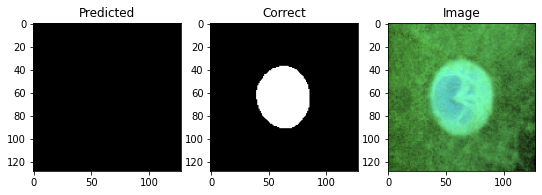

IOU: 0.0
Dice: 0.0
image #1


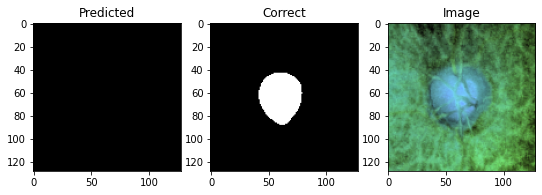

IOU: 0.0
Dice: 0.0
image #2


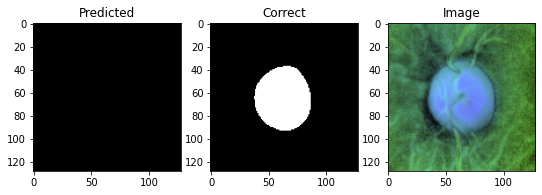

IOU: 0.0
Dice: 0.0
image #3


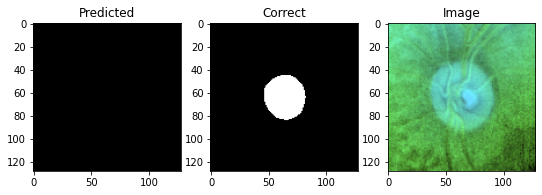

IOU: 0.0
Dice: 0.0
image #4


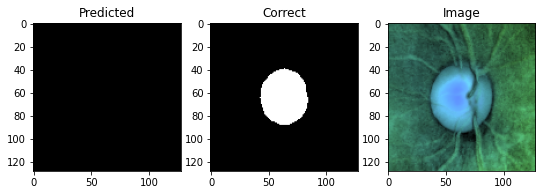

IOU: 0.0
Dice: 0.0
image #5


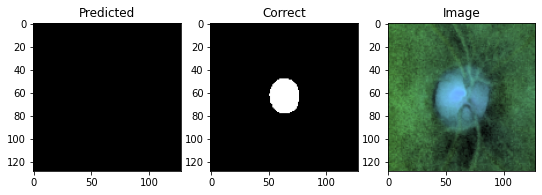

IOU: 0.0
Dice: 0.0
image #6


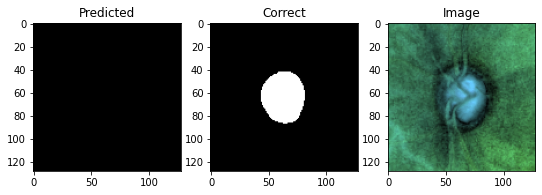

IOU: 0.0
Dice: 0.0
image #7


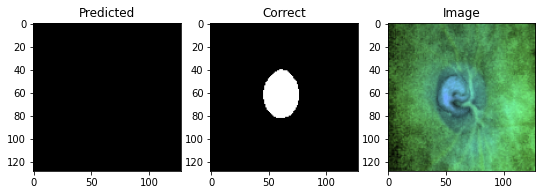

IOU: 0.0
Dice: 0.0
image #8


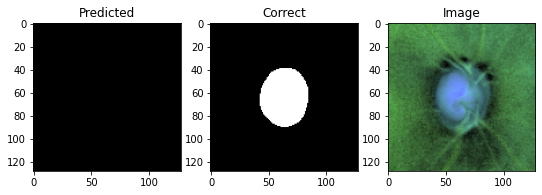

IOU: 0.0
Dice: 0.0
image #9


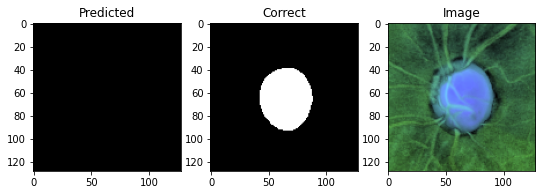

IOU: 0.0
Dice: 0.0
image #10


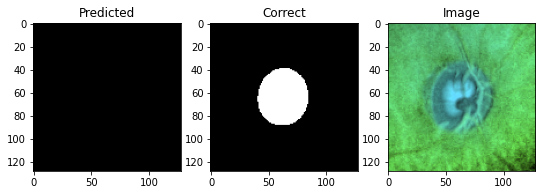

IOU: 0.0
Dice: 0.0
image #11


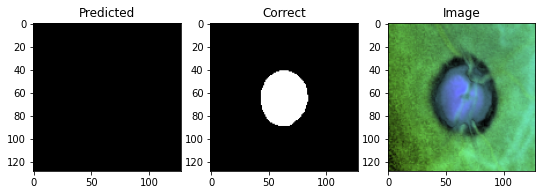

IOU: 0.0
Dice: 0.0
image #12


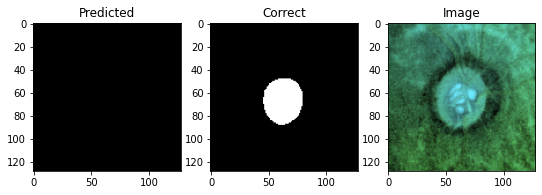

IOU: 0.0
Dice: 0.0
image #13


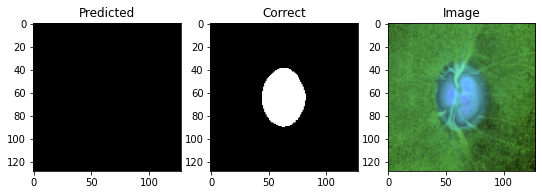

IOU: 0.0
Dice: 0.0
image #14


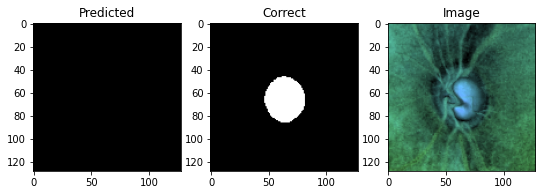

IOU: 0.0
Dice: 0.0
image #15


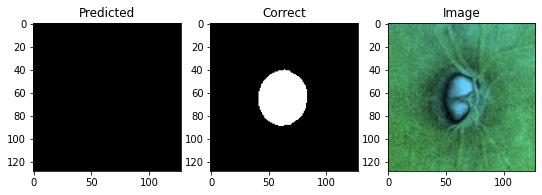

IOU: 0.0
Dice: 0.0
image #16


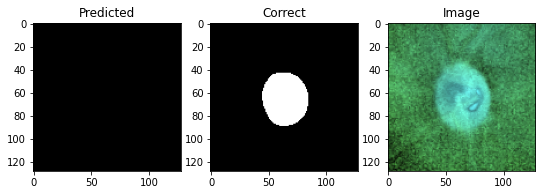

IOU: 0.0
Dice: 0.0
image #17


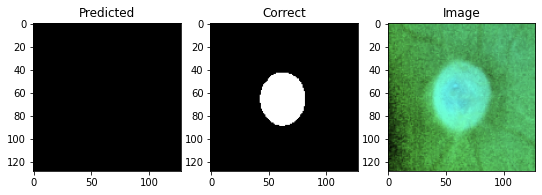

IOU: 0.0
Dice: 0.0
image #18


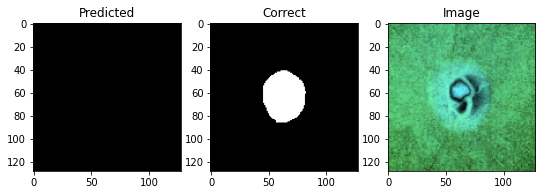

IOU: 0.0
Dice: 0.0
image #19


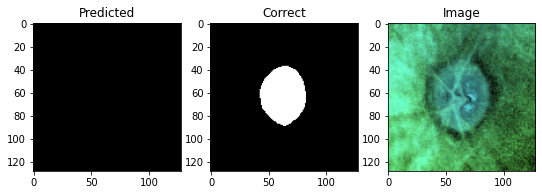

IOU: 0.0
Dice: 0.0
image #20


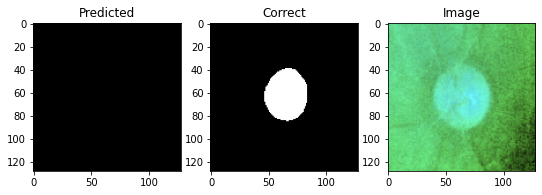

IOU: 0.0
Dice: 0.0
image #21


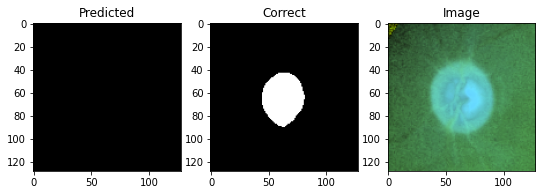

IOU: 0.0
Dice: 0.0
image #22


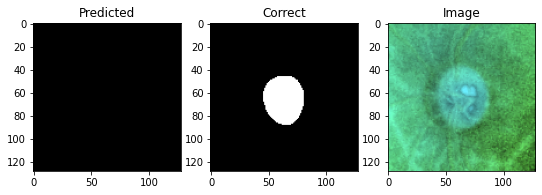

IOU: 0.0
Dice: 0.0
image #23


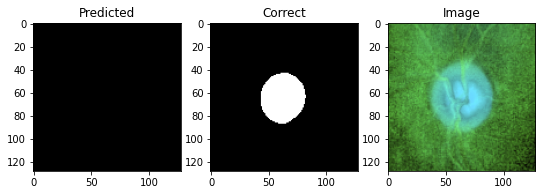

IOU: 0.0
Dice: 0.0
image #24


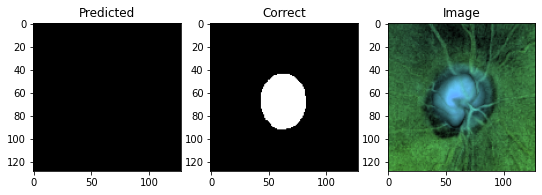

IOU: 0.0
Dice: 0.0
image #25


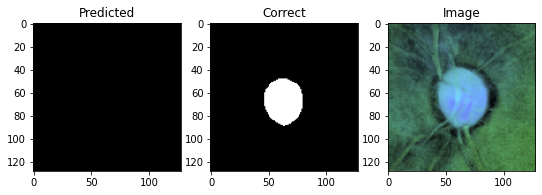

IOU: 0.0
Dice: 0.0
image #26


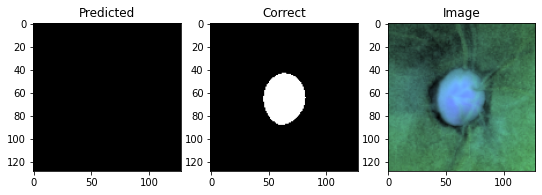

IOU: 0.0
Dice: 0.0
image #27


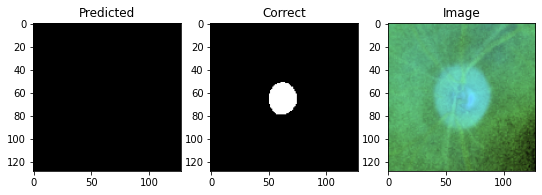

IOU: 0.0
Dice: 0.0
image #28


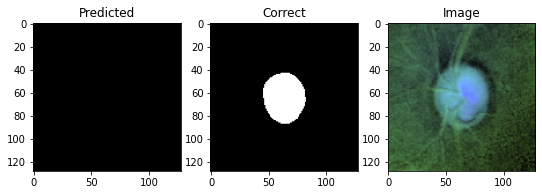

IOU: 0.0
Dice: 0.0
image #29


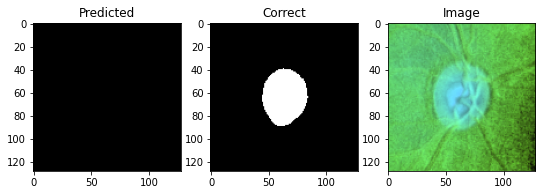

IOU: 0.0
Dice: 0.0
image #30


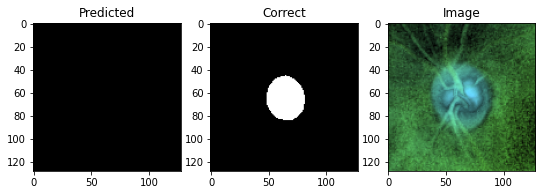

IOU: 0.0
Dice: 0.0
image #31


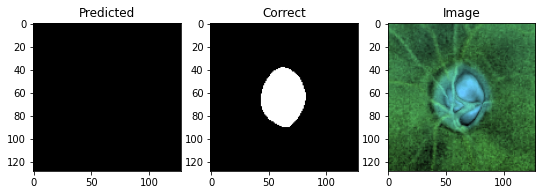

IOU: 0.0
Dice: 0.0
image #32


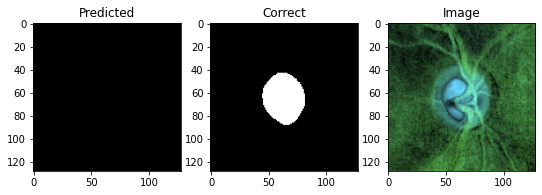

IOU: 0.0
Dice: 0.0
image #33


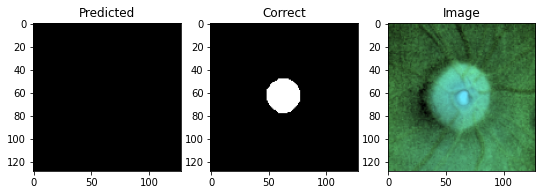

IOU: 0.0
Dice: 0.0
image #34


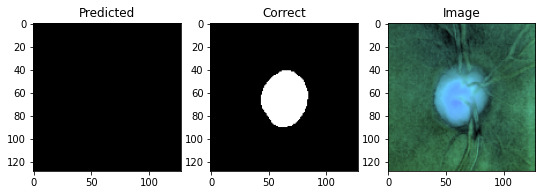

IOU: 0.0
Dice: 0.0
image #35


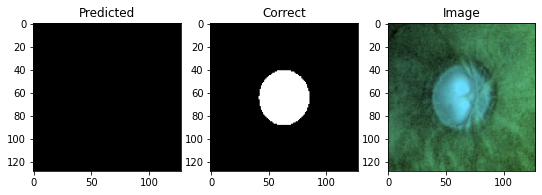

IOU: 0.0
Dice: 0.0
image #36


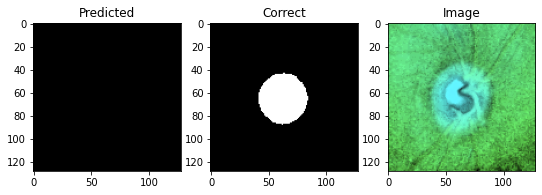

IOU: 0.0
Dice: 0.0
image #37


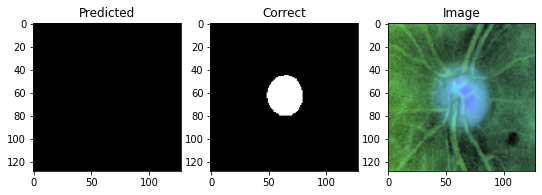

IOU: 0.0
Dice: 0.0
image #38


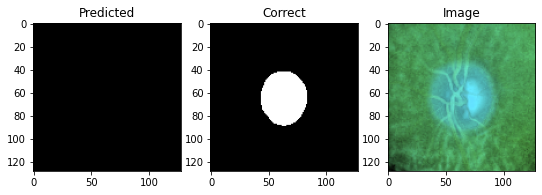

IOU: 0.0
Dice: 0.0
image #39


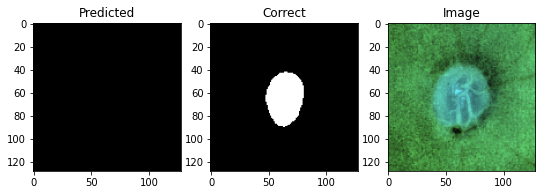

IOU: 0.0
Dice: 0.0
image #40


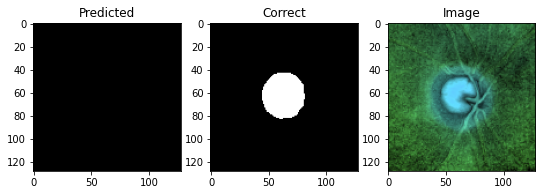

IOU: 0.0
Dice: 0.0
image #41


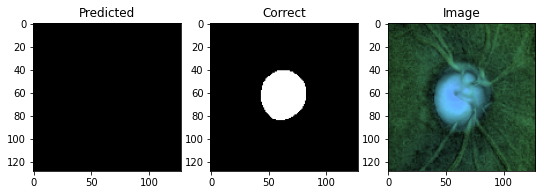

IOU: 0.0
Dice: 0.0
image #42


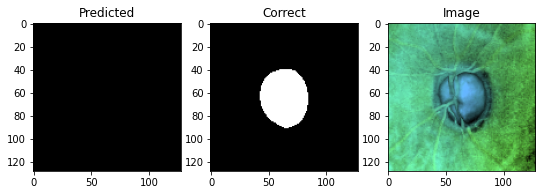

IOU: 0.0
Dice: 0.0
image #43


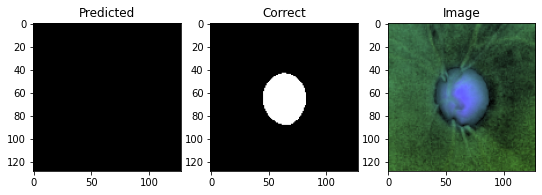

IOU: 0.0
Dice: 0.0
image #44


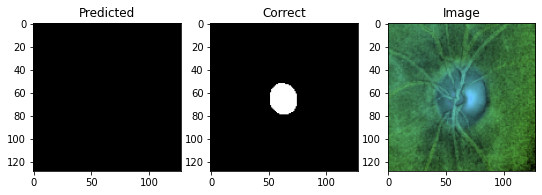

IOU: 0.0
Dice: 0.0
image #45


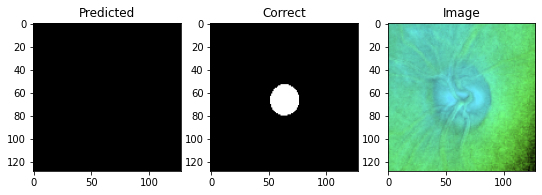

IOU: 0.0
Dice: 0.0
image #46


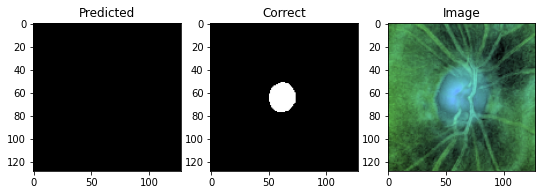

IOU: 0.0
Dice: 0.0
image #47


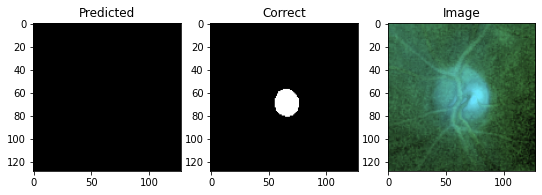

IOU: 0.0
Dice: 0.0
image #48


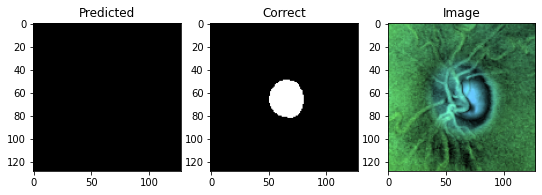

IOU: 0.0
Dice: 0.0
image #49


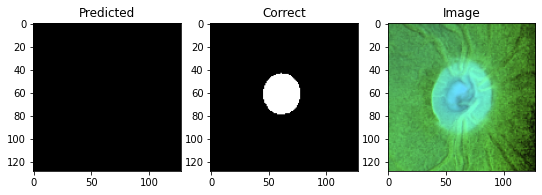

IOU: 0.0
Dice: 0.0
image #50


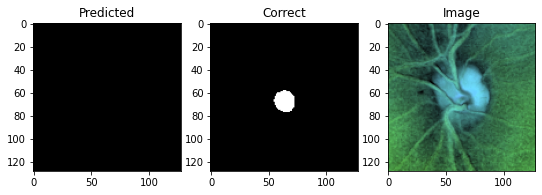

IOU: 0.0
Dice: 0.0


In [10]:
pred_iou, pred_dice, pred_cup = predict(lab_test, X_test, Y_test, model, img_size)

In [11]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.0
0.0


### Training and Test disc

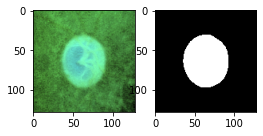

In [12]:
X_test, Z_test = next(data_generator(lab_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [13]:
model_disc = create_compile_model(img_size)

history_disc = train(lab_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_lab', 
                     model_disc, epochs, X_test, Z_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 45s 428ms/step - loss: 1.0136 - mean_IOU_gpu: 0.1006 - dice_metric: 0.1824 - val_loss: 1.0121 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 36s 367ms/step - loss: 0.9903 - mean_IOU_gpu: 0.1235 - dice_metric: 0.2195 - val_loss: 1.0112 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 34s 342ms/step - loss: 0.9731 - mean_IOU_gpu: 0.1537 - dice_metric: 0.2647 - val_loss: 1.0122 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 32s 325ms/step - loss: 0.9578 - mean_IOU_gpu: 0.2467 - dice_metric: 0.3912 - val_loss: 1.0210 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 32s 326ms/step - loss: 0.8922 - mean_IOU_gpu: 0.3961 - dice_metric: 0.5567 - val_loss: 1.0489 - val_mean_IOU_gpu: 0

99/99 [==============================] - 16s 161ms/step - loss: 0.0565 - mean_IOU_gpu: 0.8763 - dice_metric: 0.9323 - val_loss: 7.6821 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 41/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0594 - mean_IOU_gpu: 0.8741 - dice_metric: 0.9306 - val_loss: 7.6407 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 42/500
99/99 [==============================] - 16s 163ms/step - loss: 0.0518 - mean_IOU_gpu: 0.8858 - dice_metric: 0.9384 - val_loss: 7.5692 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 43/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0553 - mean_IOU_gpu: 0.8799 - dice_metric: 0.9349 - val_loss: 7.6671 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 44/500
99/99 [==============================] - 16s 163ms/step - loss: 0.0510 - mean_IOU_gpu: 0.8858 - dice_metric: 0.9386 - val_loss: 7.6810 - val_mean_IOU_gpu: 0.0000e+0

99/99 [==============================] - 16s 163ms/step - loss: 0.0512 - mean_IOU_gpu: 0.8864 - dice_metric: 0.9386 - val_loss: 8.4705 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 80/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0463 - mean_IOU_gpu: 0.8940 - dice_metric: 0.9431 - val_loss: 8.4015 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 81/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0480 - mean_IOU_gpu: 0.8907 - dice_metric: 0.9411 - val_loss: 8.4929 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 82/500
99/99 [==============================] - 16s 163ms/step - loss: 0.0490 - mean_IOU_gpu: 0.8889 - dice_metric: 0.9404 - val_loss: 8.3924 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 83/500
99/99 [==============================] - 16s 163ms/step - loss: 0.0525 - mean_IOU_gpu: 0.8858 - dice_metric: 0.9377 - val_loss: 8.5204 - val_mean_IOU_gpu: 0.0000e+0

99/99 [==============================] - 16s 162ms/step - loss: 0.0611 - mean_IOU_gpu: 0.8708 - dice_metric: 0.9280 - val_loss: 8.5576 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 119/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0408 - mean_IOU_gpu: 0.9064 - dice_metric: 0.9503 - val_loss: 8.6838 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 120/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0386 - mean_IOU_gpu: 0.9092 - dice_metric: 0.9519 - val_loss: 8.8089 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 121/500
99/99 [==============================] - 16s 164ms/step - loss: 0.0430 - mean_IOU_gpu: 0.9003 - dice_metric: 0.9470 - val_loss: 8.7082 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 122/500
99/99 [==============================] - 16s 163ms/step - loss: 0.0368 - mean_IOU_gpu: 0.9129 - dice_metric: 0.9541 - val_loss: 8.6620 - val_mean_IOU_gpu: 0.000

99/99 [==============================] - 16s 158ms/step - loss: 0.0464 - mean_IOU_gpu: 0.8976 - dice_metric: 0.9445 - val_loss: 8.6634 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 158/500
99/99 [==============================] - 16s 163ms/step - loss: 0.0403 - mean_IOU_gpu: 0.9059 - dice_metric: 0.9500 - val_loss: 8.8306 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 159/500
99/99 [==============================] - 16s 161ms/step - loss: 0.0479 - mean_IOU_gpu: 0.8945 - dice_metric: 0.9425 - val_loss: 8.8033 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 160/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0410 - mean_IOU_gpu: 0.9048 - dice_metric: 0.9492 - val_loss: 8.5432 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 161/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0398 - mean_IOU_gpu: 0.9070 - dice_metric: 0.9505 - val_loss: 8.8470 - val_mean_IOU_gpu: 0.000

99/99 [==============================] - 16s 163ms/step - loss: 0.0487 - mean_IOU_gpu: 0.8932 - dice_metric: 0.9412 - val_loss: 9.0765 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 197/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0410 - mean_IOU_gpu: 0.9044 - dice_metric: 0.9490 - val_loss: 9.2588 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 198/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0398 - mean_IOU_gpu: 0.9076 - dice_metric: 0.9509 - val_loss: 8.9081 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 199/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0476 - mean_IOU_gpu: 0.8938 - dice_metric: 0.9424 - val_loss: 9.1861 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 200/500
99/99 [==============================] - 16s 158ms/step - loss: 0.0442 - mean_IOU_gpu: 0.8981 - dice_metric: 0.9452 - val_loss: 9.0612 - val_mean_IOU_gpu: 0.000

99/99 [==============================] - 16s 162ms/step - loss: 0.0389 - mean_IOU_gpu: 0.9098 - dice_metric: 0.9519 - val_loss: 8.7912 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 236/500
99/99 [==============================] - 16s 161ms/step - loss: 0.0425 - mean_IOU_gpu: 0.9019 - dice_metric: 0.9474 - val_loss: 9.0705 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 237/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0386 - mean_IOU_gpu: 0.9096 - dice_metric: 0.9522 - val_loss: 9.1637 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 238/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0440 - mean_IOU_gpu: 0.9020 - dice_metric: 0.9469 - val_loss: 9.1561 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 239/500
99/99 [==============================] - 16s 164ms/step - loss: 0.0403 - mean_IOU_gpu: 0.9047 - dice_metric: 0.9493 - val_loss: 9.1323 - val_mean_IOU_gpu: 0.000

99/99 [==============================] - 16s 161ms/step - loss: 0.0348 - mean_IOU_gpu: 0.9157 - dice_metric: 0.9557 - val_loss: 8.9076 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 275/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0397 - mean_IOU_gpu: 0.9067 - dice_metric: 0.9502 - val_loss: 8.9920 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 276/500
99/99 [==============================] - 16s 163ms/step - loss: 0.0380 - mean_IOU_gpu: 0.9109 - dice_metric: 0.9524 - val_loss: 9.2535 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 277/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0417 - mean_IOU_gpu: 0.9037 - dice_metric: 0.9485 - val_loss: 9.3480 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 278/500
99/99 [==============================] - 16s 163ms/step - loss: 0.0410 - mean_IOU_gpu: 0.9056 - dice_metric: 0.9492 - val_loss: 8.8296 - val_mean_IOU_gpu: 0.000

99/99 [==============================] - 16s 162ms/step - loss: 0.0401 - mean_IOU_gpu: 0.9056 - dice_metric: 0.9498 - val_loss: 9.3222 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 314/500
99/99 [==============================] - 16s 164ms/step - loss: 0.0399 - mean_IOU_gpu: 0.9080 - dice_metric: 0.9507 - val_loss: 9.5222 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 315/500
99/99 [==============================] - 16s 164ms/step - loss: 0.0340 - mean_IOU_gpu: 0.9163 - dice_metric: 0.9560 - val_loss: 9.5052 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 316/500
99/99 [==============================] - 16s 163ms/step - loss: 0.0392 - mean_IOU_gpu: 0.9079 - dice_metric: 0.9510 - val_loss: 9.2309 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 317/500
99/99 [==============================] - 16s 163ms/step - loss: 0.0376 - mean_IOU_gpu: 0.9106 - dice_metric: 0.9526 - val_loss: 9.3620 - val_mean_IOU_gpu: 0.000

99/99 [==============================] - 16s 163ms/step - loss: 0.0415 - mean_IOU_gpu: 0.9064 - dice_metric: 0.9493 - val_loss: 9.3283 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 353/500
99/99 [==============================] - 16s 163ms/step - loss: 0.0370 - mean_IOU_gpu: 0.9124 - dice_metric: 0.9535 - val_loss: 9.2831 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 354/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0395 - mean_IOU_gpu: 0.9085 - dice_metric: 0.9512 - val_loss: 9.0752 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 355/500
99/99 [==============================] - 16s 163ms/step - loss: 0.0522 - mean_IOU_gpu: 0.8877 - dice_metric: 0.9379 - val_loss: 9.4003 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 356/500
99/99 [==============================] - 16s 163ms/step - loss: 0.0358 - mean_IOU_gpu: 0.9143 - dice_metric: 0.9547 - val_loss: 9.3872 - val_mean_IOU_gpu: 0.000

99/99 [==============================] - 16s 163ms/step - loss: 0.0374 - mean_IOU_gpu: 0.9122 - dice_metric: 0.9532 - val_loss: 9.3407 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 392/500
99/99 [==============================] - 16s 163ms/step - loss: 0.0384 - mean_IOU_gpu: 0.9092 - dice_metric: 0.9514 - val_loss: 9.3763 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 393/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0417 - mean_IOU_gpu: 0.9054 - dice_metric: 0.9488 - val_loss: 9.1237 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 394/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0374 - mean_IOU_gpu: 0.9120 - dice_metric: 0.9532 - val_loss: 9.4473 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 395/500
99/99 [==============================] - 16s 163ms/step - loss: 0.0389 - mean_IOU_gpu: 0.9084 - dice_metric: 0.9511 - val_loss: 9.4164 - val_mean_IOU_gpu: 0.000

99/99 [==============================] - 16s 163ms/step - loss: 0.0365 - mean_IOU_gpu: 0.9117 - dice_metric: 0.9534 - val_loss: 9.6720 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 431/500
99/99 [==============================] - 16s 161ms/step - loss: 0.0354 - mean_IOU_gpu: 0.9155 - dice_metric: 0.9552 - val_loss: 9.4083 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 432/500
99/99 [==============================] - 16s 158ms/step - loss: 0.0365 - mean_IOU_gpu: 0.9124 - dice_metric: 0.9537 - val_loss: 10.1351 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 433/500
99/99 [==============================] - 16s 163ms/step - loss: 0.0371 - mean_IOU_gpu: 0.9122 - dice_metric: 0.9534 - val_loss: 9.2351 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 434/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0462 - mean_IOU_gpu: 0.8960 - dice_metric: 0.9435 - val_loss: 9.5083 - val_mean_IOU_gpu: 0.00

99/99 [==============================] - 16s 163ms/step - loss: 0.0390 - mean_IOU_gpu: 0.9083 - dice_metric: 0.9509 - val_loss: 9.6929 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 470/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0353 - mean_IOU_gpu: 0.9160 - dice_metric: 0.9554 - val_loss: 9.3885 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 471/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0348 - mean_IOU_gpu: 0.9161 - dice_metric: 0.9556 - val_loss: 9.4126 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 472/500
99/99 [==============================] - 16s 162ms/step - loss: 0.0350 - mean_IOU_gpu: 0.9168 - dice_metric: 0.9559 - val_loss: 9.5665 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 473/500
99/99 [==============================] - 16s 163ms/step - loss: 0.0364 - mean_IOU_gpu: 0.9126 - dice_metric: 0.9537 - val_loss: 9.6785 - val_mean_IOU_gpu: 0.000

image #0


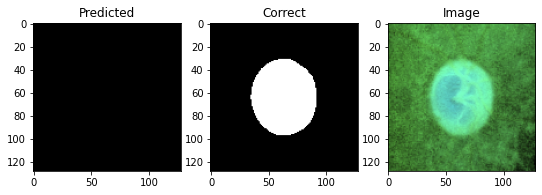

IOU: 0.0
Dice: 0.0
image #1


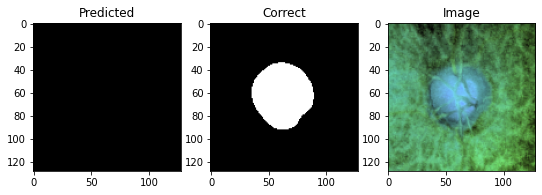

IOU: 0.0
Dice: 0.0
image #2


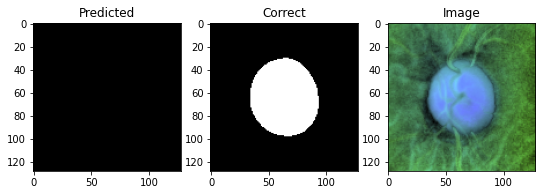

IOU: 0.0
Dice: 0.0
image #3


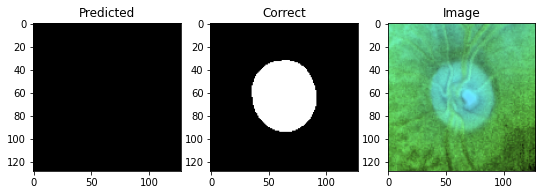

IOU: 0.0
Dice: 0.0
image #4


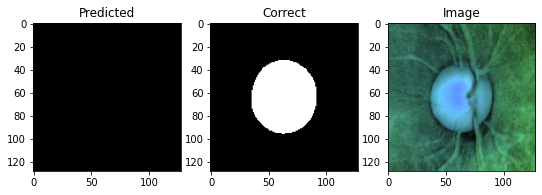

IOU: 0.0
Dice: 0.0
image #5


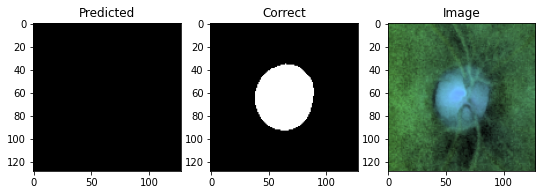

IOU: 0.0
Dice: 0.0
image #6


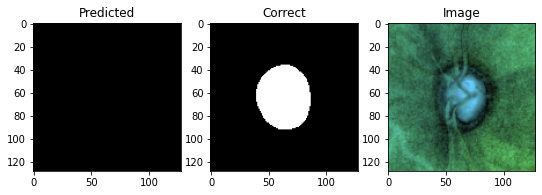

IOU: 0.0
Dice: 0.0
image #7


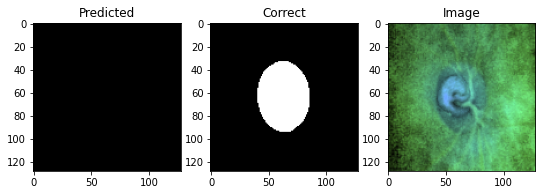

IOU: 0.0
Dice: 0.0
image #8


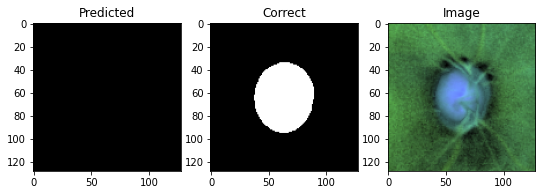

IOU: 0.0
Dice: 0.0
image #9


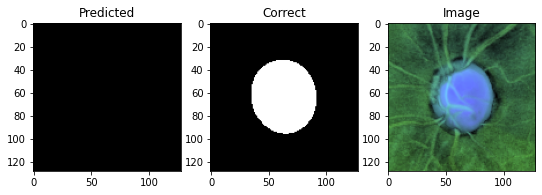

IOU: 0.0
Dice: 0.0
image #10


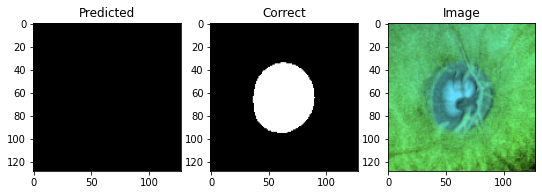

IOU: 0.0
Dice: 0.0
image #11


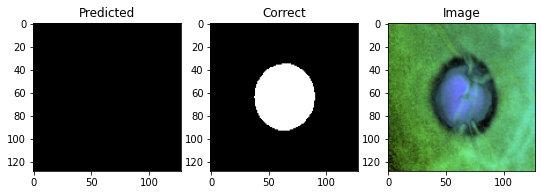

IOU: 0.0
Dice: 0.0
image #12


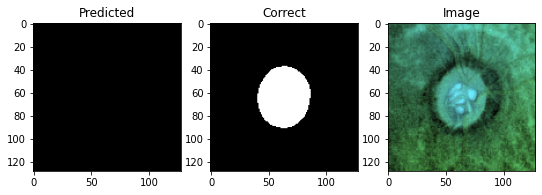

IOU: 0.0
Dice: 0.0
image #13


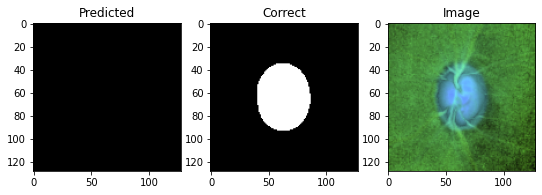

IOU: 0.0
Dice: 0.0
image #14


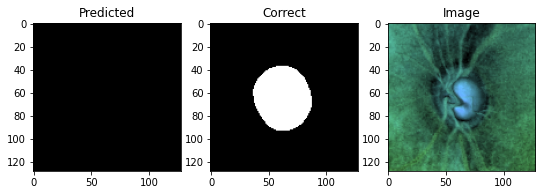

IOU: 0.0
Dice: 0.0
image #15


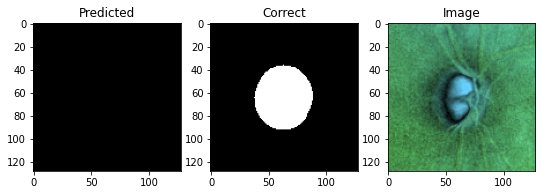

IOU: 0.0
Dice: 0.0
image #16


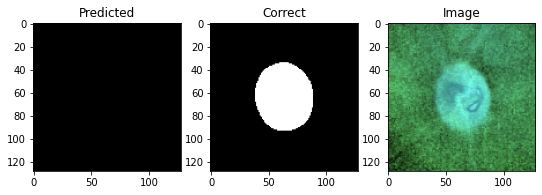

IOU: 0.0
Dice: 0.0
image #17


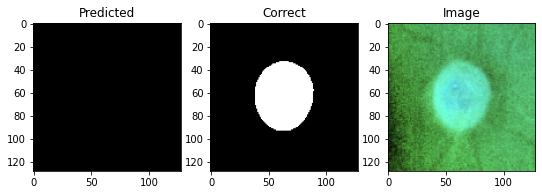

IOU: 0.0
Dice: 0.0
image #18


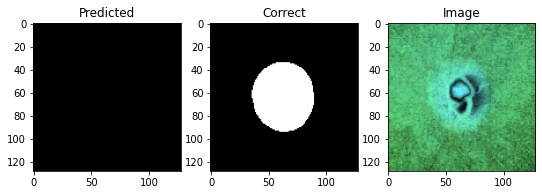

IOU: 0.0
Dice: 0.0
image #19


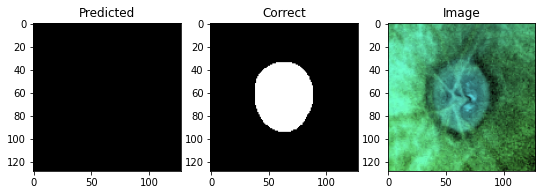

IOU: 0.0
Dice: 0.0
image #20


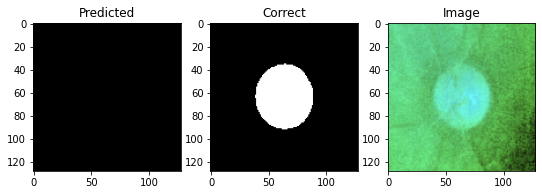

IOU: 0.0
Dice: 0.0
image #21


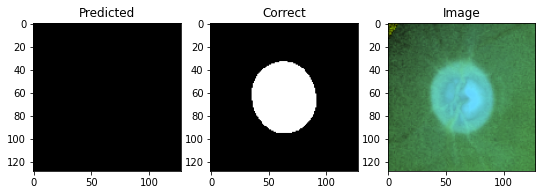

IOU: 0.0
Dice: 0.0
image #22


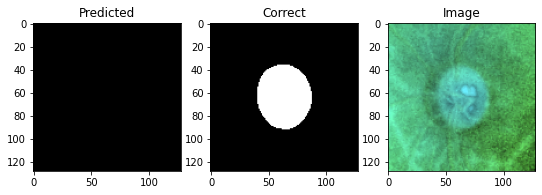

IOU: 0.0
Dice: 0.0
image #23


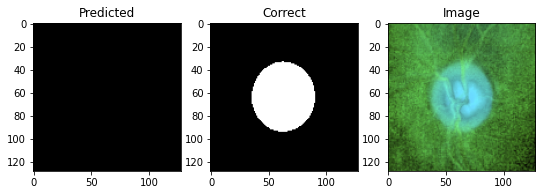

IOU: 0.0
Dice: 0.0
image #24


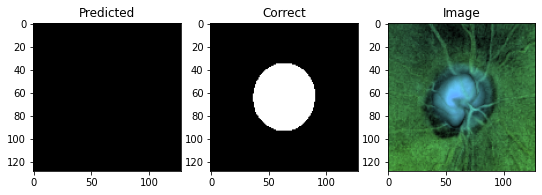

IOU: 0.0
Dice: 0.0
image #25


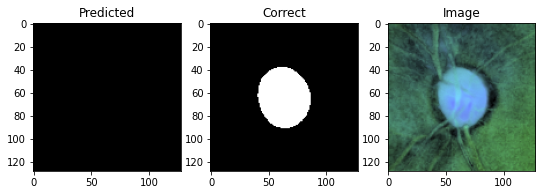

IOU: 0.0
Dice: 0.0
image #26


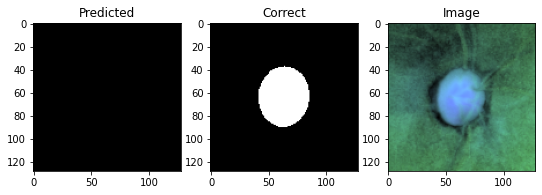

IOU: 0.0
Dice: 0.0
image #27


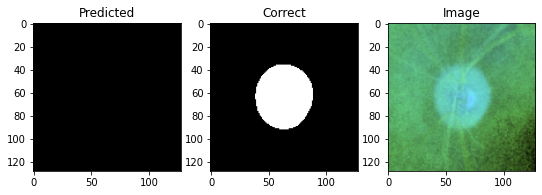

IOU: 0.0
Dice: 0.0
image #28


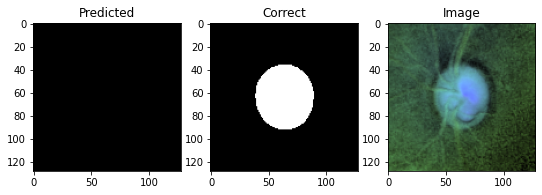

IOU: 0.0
Dice: 0.0
image #29


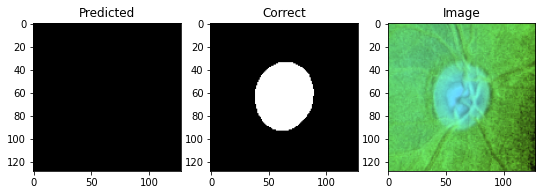

IOU: 0.0
Dice: 0.0
image #30


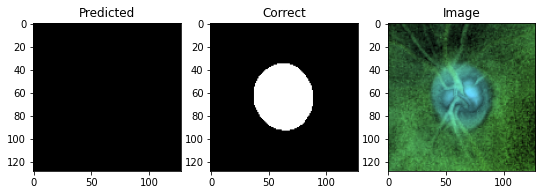

IOU: 0.0
Dice: 0.0
image #31


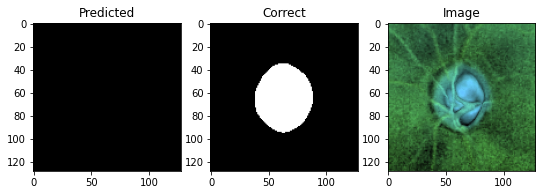

IOU: 0.0
Dice: 0.0
image #32


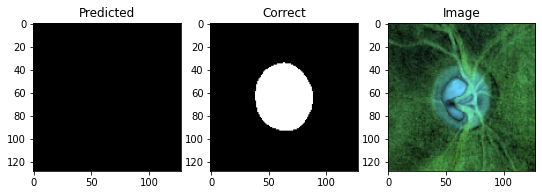

IOU: 0.0
Dice: 0.0
image #33


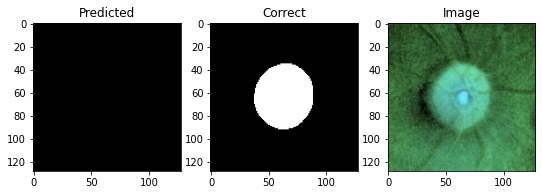

IOU: 0.0
Dice: 0.0
image #34


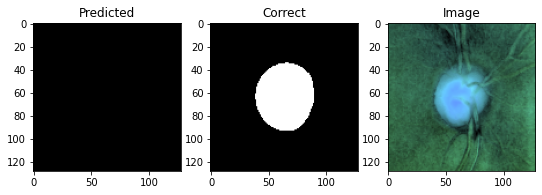

IOU: 0.0
Dice: 0.0
image #35


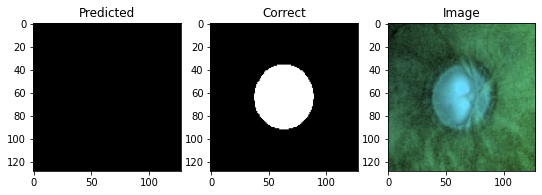

IOU: 0.0
Dice: 0.0
image #36


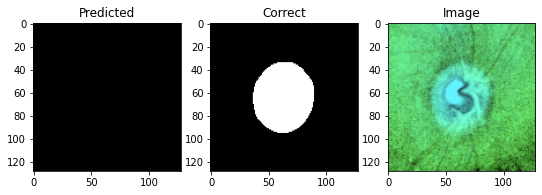

IOU: 0.0
Dice: 0.0
image #37


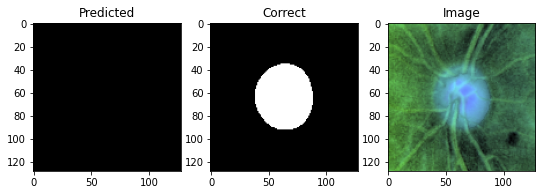

IOU: 0.0
Dice: 0.0
image #38


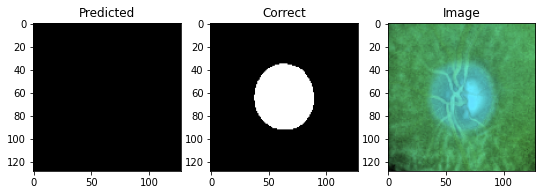

IOU: 0.0
Dice: 0.0
image #39


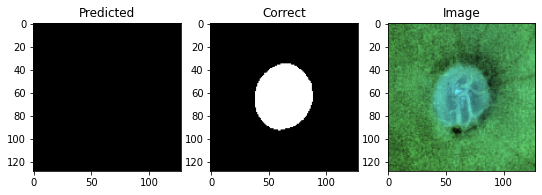

IOU: 0.0
Dice: 0.0
image #40


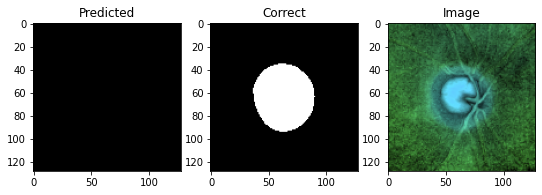

IOU: 0.0
Dice: 0.0
image #41


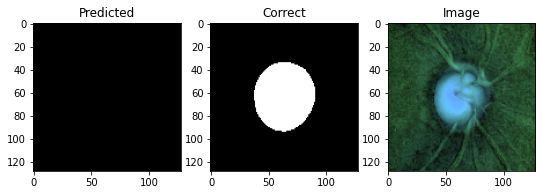

IOU: 0.0
Dice: 0.0
image #42


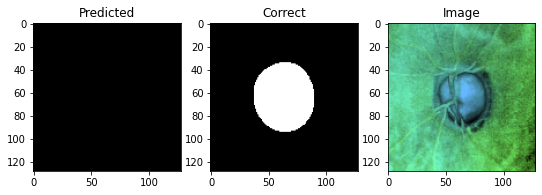

IOU: 0.0
Dice: 0.0
image #43


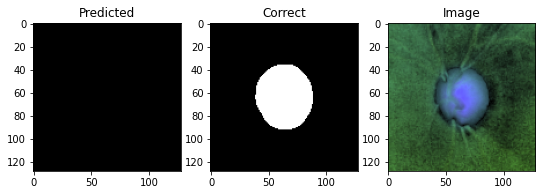

IOU: 0.0
Dice: 0.0
image #44


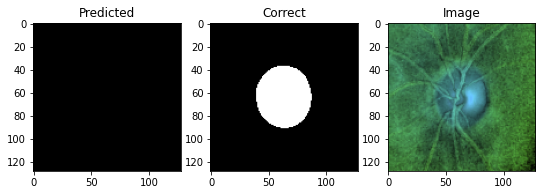

IOU: 0.0
Dice: 0.0
image #45


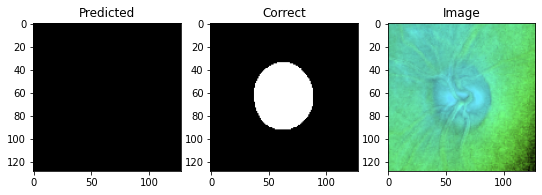

IOU: 0.0
Dice: 0.0
image #46


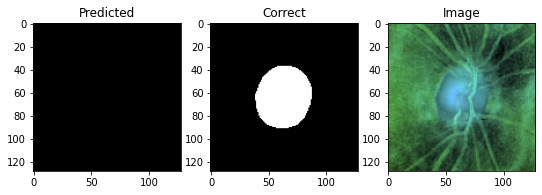

IOU: 0.0
Dice: 0.0
image #47


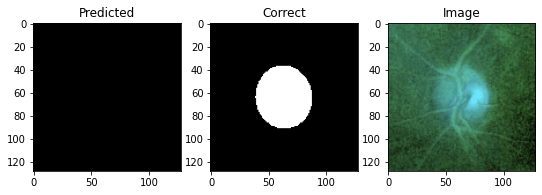

IOU: 0.0
Dice: 0.0
image #48


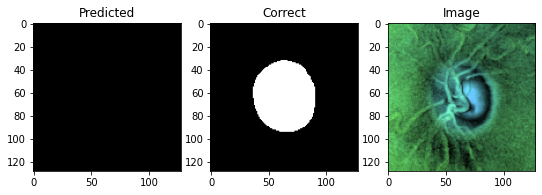

IOU: 0.0
Dice: 0.0
image #49


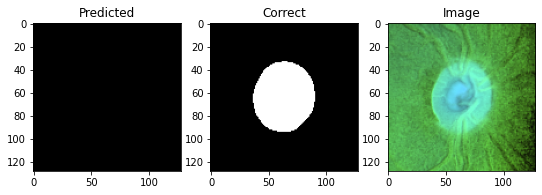

IOU: 0.0
Dice: 0.0
image #50


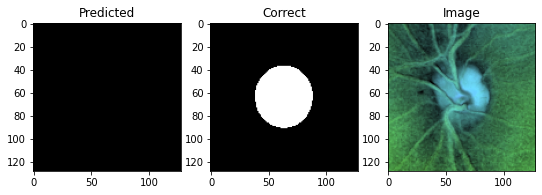

IOU: 0.0
Dice: 0.0


In [14]:
pred_iou, pred_dice, pred_disc = predict(lab_test, X_test, Z_test, model_disc, img_size)

In [15]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.0
0.0


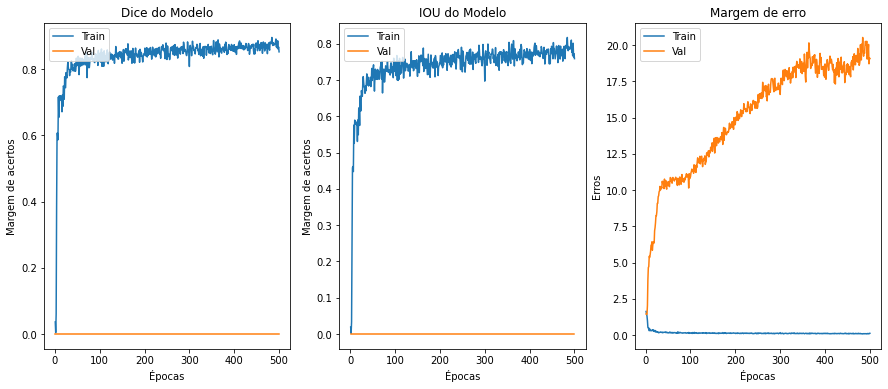

In [16]:
plot_results(history_cup, epochs)

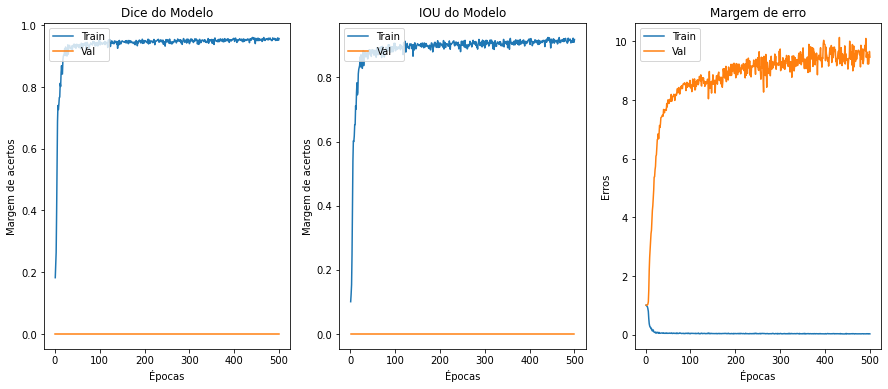

In [17]:
plot_results(history_disc, epochs)

In [21]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)

In [22]:
pd.DataFrame(data= result)

cdr  area
0     0     0
1     0     0
2     0     0
3     0     0
4     0     0
5     0     0
6     0     0
7     0     0
8     0     0
9     0     0
10    0     0
11    0     0
12    0     0
13    0     0
14    0     0
15    0     0
16    0     0
17    0     0
18    0     0
19    0     0
20    0     0
21    0     0
22    0     0
23    0     0
24    0     0
25    0     0
26    0     0
27    0     0
28    0     0
29    0     0
30    0     0
31    0     0
32    0     0
33    0     0
34    0     0
35    0     0
36    0     0
37    0     0
38    0     0
39    0     0
40    0     0
41    0     0
42    0     0
43    0     0
44    0     0
45    0     0
46    0     0
47    0     0
48    0     0
49    0     0
50    0     0

In [23]:
cup = np.array(diametros_cup)
disc = np.array(diametros_disc)
pd.DataFrame(data={'cup - dm': cup[:,0], 'cup - dM': cup[:,1], 'disc - dm': disc[:,0], 'disc - dM': disc[:,1]})

cup - dm  cup - dM  disc - dm  disc - dM
0          0         0          0          0
1          0         0          0          0
2          0         0          0          0
3          0         0          0          0
4          0         0          0          0
5          0         0          0          0
6          0         0          0          0
7          0         0          0          0
8          0         0          0          0
9          0         0          0          0
10         0         0          0          0
11         0         0          0          0
12         0         0          0          0
13         0         0          0          0
14         0         0          0          0
15         0         0          0          0
16         0         0          0          0
17         0         0          0          0
18         0         0          0          0
19         0         0          0          0
20         0         0          0          0
21         0         0          0          0
22         0         0          0          0
23         0         0          0          0
24         0         0          0          0
25         0         0          0          0
26         0         0          0          0
27         0         0          0          0
28         0         0          0          0
29         0         0          0          0
30         0         0          0          0
31         0         0          0          0
32         0         0          0          0
33         0         0          0          0
34         0         0          0          0
35         0         0          0          0
36         0         0          0          0
37         0         0          0          0
38         0         0          0          0
39         0         0          0          0
40         0         0          0          0
41         0         0          0          0
42         0         0          0          0
43         0         0          0          0
44         0         0          0          0
45         0         0          0          0
46         0         0          0          0
47         0         0          0          0
48         0         0          0          0
49         0         0          0          0
50         0         0          0          0